# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Clustering and dimension-reduction
### VIDEO: K-nearest neighbor
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

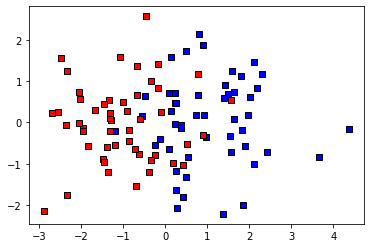

In [2]:
## Create data

nPerClust = 50

# XY centroid locations
A = [  1, 0 ]
B = [ -1, 0 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b),axis=1) )
grouplabels = np.concatenate((np.zeros(nPerClust),np.ones(nPerClust)))

# group color assignment
groupcolors = 'br'

# show the data
fig,ax = plt.subplots(1)
ax.plot(data[grouplabels==0,0],data[grouplabels==0,1],'ks',markerfacecolor=groupcolors[0])
ax.plot(data[grouplabels==1,0],data[grouplabels==1,1],'ks',markerfacecolor=groupcolors[1])
plt.show()

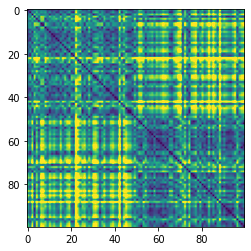

In [3]:
## compute distance matrix

# initialize
distmat = np.zeros((nPerClust*2,nPerClust*2))

# loop over elements
for i in range(nPerClust*2):
    for j in range(nPerClust*2):
        distmat[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

plt.imshow(distmat,vmax=4)
plt.show()

<ipython-input-4-c5de8ca4b32a>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor='g',markersize=15)


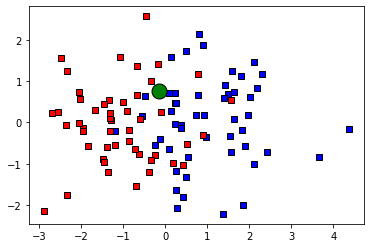

In [4]:
## create the new data point

# random new point
newpoint = 2*np.random.rand(2)-1

# and plot it
ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor='g',markersize=15)
fig

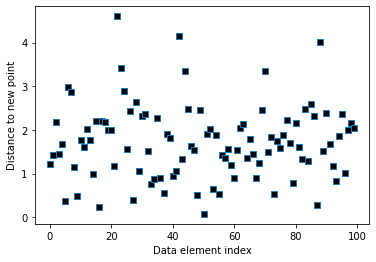

In [5]:
# compute distance vector
distvec = np.zeros(nPerClust*2)

for i in range(nPerClust*2):
    distvec[i] = np.sqrt( (data[i,0]-newpoint[0])**2 + (data[i,1]-newpoint[1])**2 )
    

# show the distances
plt.plot(distvec,'s',markerfacecolor='k')
plt.xlabel('Data element index')
plt.ylabel('Distance to new point')
plt.show()

[1. 0. 1.]
New data belong to group 1


<ipython-input-6-8203ed846fa3>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor='g',markersize=15)
<ipython-input-6-8203ed846fa3>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor=groupcolors[whichgroup])


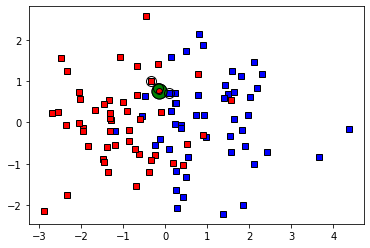

In [6]:
## now for the labeling

# k parameter
k = 3

# sort the distances
sortidx = np.argsort(distvec)

# find the group assignment of the nearest neighbors
print(grouplabels[sortidx[:k]])
whichgroup = int( np.median(grouplabels[sortidx[:k]]) )
print('New data belong to group ' + str(whichgroup))

# and re-plot
ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor='g',markersize=15)
ax.plot(newpoint[0],newpoint[1],'ko',MarkerFaceColor=groupcolors[whichgroup])
ax.plot(data[sortidx[:k],0],data[sortidx[:k],1],'ko',markersize=10,fillstyle='none')
fig

In [10]:
## now using Python functions
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(data,grouplabels)

whichgroupP = knn.predict(newpoint.reshape(1,-1))

print('New data belong to group ' + str(whichgroupP[0]))

New data belong to group 1.0
